# PS1: Exploratory Data Analysis on COVID-19 Datasets


### Learning the data using visualization and simple linear regression

1. First, run the example and understand the ML process and be familir with Python package functions for simple linear regression. 

2. Apply exploratory data analysis and simple regression on COVID-19 dataset(s). 

#### Write your name

- Quinn Wass


###  Simple Linear Regression example

Follow the code and observe the results

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

This function just merges the OECD's life satisfaction data and the IMF's GDP per capita data. It's a bit too long and boring and it's not specific to Machine Learning, which is why I left it out of the book.

In [3]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

The code expects the data files to be located in the current directory. Fetch the files in datasets/lifesat.

In [4]:
import os
datapath = os.path.join("datasets", "lifesat", "")

In [5]:
# To plot pretty figures directly within Jupyter
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [6]:
# Download the data
import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

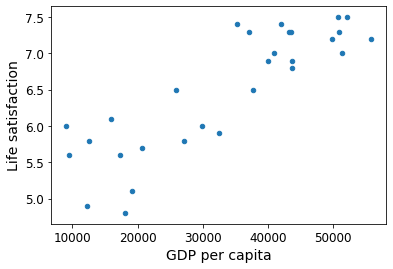

In [7]:
# Code example of load the data and prepared the data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()


### Plot scatterplot and the regression function

In [8]:
# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model (we use all data for training --> Later we will divide the data into training data and testing data)
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

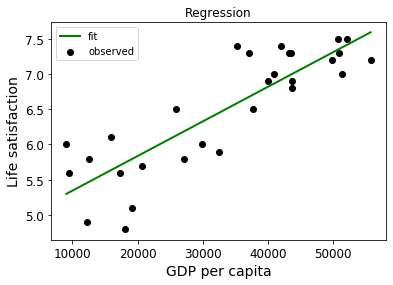

In [9]:
# Plot scatterplot and the regression function
plt.scatter(X, y, color='black', label='observed')

plt.plot(X, model.predict(X), label='fit', color='Green', linewidth=2)

plt.xlabel('GDP per capita')
plt.ylabel('Life satisfaction')
plt.title('Regression')
plt.legend(loc='best')

plt.show()

In [10]:
# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]

[[5.96242338]]


## Model evaluation metrics for regression

Evaluation metrics for classification problems, such as **accuracy**, are not useful for regression problems. Instead, we need evaluation metrics designed for comparing continuous values.

Let's create some example numeric predictions, and calculate **three common evaluation metrics** for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

### Model Evaluation Example

#### 1. Preparing X and Y using pandas
- We already did this process above
- scikit-learn expects X (feature matrix) and Y (response vector) to be NumPy arrays.
- However, pandas is built on top of NumPy.
- Thus, X can be a pandas DataFrame and y can be a pandas Series!

#### 2. Splitting X and y into training and testing sets

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#### 3. Linear regression in scikit-learn

In [12]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### 4. Making predictions

In [13]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

#### 5. Computing the RMSE for our Sales predictions

In [14]:
from sklearn import metrics

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.4198326061843324


### Assignment


###  Part 1: Explore insight of the data using other visualization tools

The following Git repository is for the COVID-19 visual dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering:
https://github.com/CSSEGISandData/COVID-19

Read the information on the dashboard and check the datasets details

Datasets are located in a folder: csse_covid_19_data

### Tasks

1. Select attributes (columns) you are interested (either US only or all data).

   1.1 (optional) If you find any missing data or/and invalid data in the selected attributes you would like to work on, apply tools to handle these data. 

2. Conduct exploratory data analysis on the selected data and visualize the data. This may include the following but not limited:

(a) The mean, median and standard deviation

(b) Draw boxplots

(c) Draw histograms

(c) Draw scatter plots

(d) simple linear regression function with a scatter plot

## Load Data

In [15]:
import os
datapath = os.path.join("csse_covid_19_data", "csse_covid_19_data", "")

import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"
os.makedirs(datapath, exist_ok=True)
for filename in ("time_series_covid19_confirmed_US.csv",):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "csse_covid_19_data/csse_covid_19_data/" + filename
    urllib.request.urlretrieve(DOWNLOAD_ROOT, datapath + filename)

In [16]:
us_confirmed_timeseries = pd.read_csv(datapath + "time_series_covid19_confirmed_US.csv")
wash_cases = us_confirmed_timeseries.loc[us_confirmed_timeseries["Province_State"] == "Washington"]
wash_cases = wash_cases.drop(columns=['UID', 'iso2', 'iso3', 'FIPS', 'Province_State', 'Country_Region', 'Lat', 'Long_'
, 'code3', 'Combined_Key', 'Admin2'])
cases_by_date = wash_cases.sum()

## Analyze Data

              cases  day_number
count     84.000000   84.000000
mean    1998.630952   41.500000
std     3327.958992   24.392622
min        1.000000    0.000000
25%        1.000000   20.750000
50%       33.000000   41.500000
75%     2393.750000   62.250000
max    10799.000000   83.000000


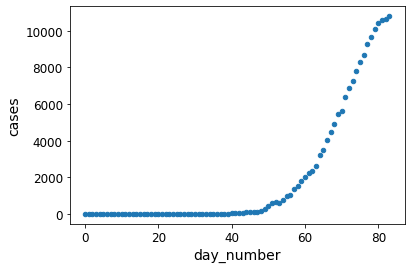

In [17]:
df = pd.DataFrame({'date':cases_by_date.index, 'cases':cases_by_date.values})
df['day_number'] = df.index
df.plot.scatter(x="day_number", y="cases")
print(df.describe())

## Train Linear Regression Model

In [18]:
X = np.c_[df["day_number"]]
y = np.c_[df["cases"]]

In [19]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

model = LinearRegression().fit(X, y)

## Visualize Linear Regression Model

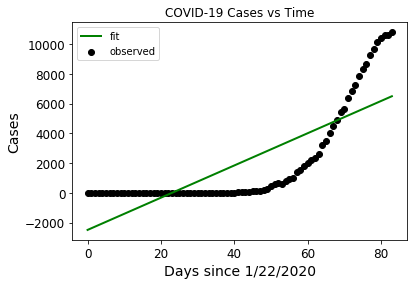

In [20]:
plt.scatter(X, y, color='black', label='observed')

plt.plot(X, model.predict(X), label='fit', color='Green', linewidth=2)

plt.xlabel('Days since 1/22/2020')
plt.ylabel("Cases")
plt.title('COVID-19 Cases vs Time')
plt.legend(loc='best')
plt.show()

## Cross Validation Analysis

The cross validation mean is -97. This means our model fits the data very poorly. This can also be seen by looking at the graph.

In [21]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, df["cases"], cv=5)
print(scores.mean())

-97.06959963937405


## Train Logistic Regression Model
The data looks to exhibit exponential growth. A logistic regression model may be more appropriate.

In [22]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

lg = LogisticRegression(random_state=0, max_iter=5000).fit(X, df["cases"])

## Visualize Linear Regression Model

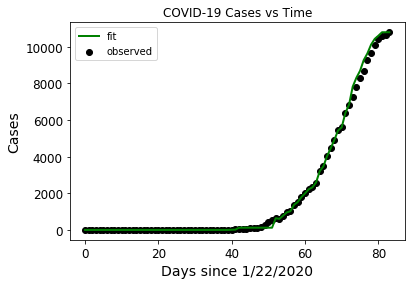

In [23]:
plt.scatter(X, y, color='black', label='observed')

plt.plot(X, lg.predict(X), label='fit', color='Green', linewidth=2)

plt.xlabel('Days since 1/22/2020')
plt.ylabel("Cases")
plt.title('COVID-19 Cases vs Time')
plt.legend(loc='best')
plt.show()

## Cross Validation Analysis
The cross validation score is 0.45. While this is still below 1, it it significantly higher than our previous value of -97

In [24]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lg, X, df["cases"], cv=5)
print(scores.mean())

0.4514705882352941


### Part 2: Write a summary of what you find from the data

The data shown above tracks the number of COVID-19 Cases in Washington State. The data shows little change until day 40 where the cases start to increase exponentially. Due to this, a linear model is insufficiant. Furthermore, a logistic model works much better. It should be noted that the number of cases is changing due to external factors such as social distancing and really cannot be modeled based on either of these models long term. 



Note to reader: These Cross Validation Scores were calculated on 4/13/2020. Since the csv file is updated frequently as new data comes in and the data in this notebook changes as a result, I do not expect the scores to remain the same. If we have a true flattening of the curve the linear model will perform better in the new part and the logistic model will perform worse.